In [64]:
import numpy as np

import pandas as pd
from pandas import DataFrame
from pandas import Series
from pandas import Index

import matplotlib.pyplot as plt
%matplotlib inline

import os

from sklearn import tree, preprocessing

import missingno

In [12]:
train = pd.read_csv(os.path.join('./', 'train_data.csv'))
print(train.shape)
print(train.columns)
print(train.dtypes)

poi = train['poi']
train = train.drop('poi', axis=1)
print(train.shape)

(113, 22)
Index(['name', 'bonus', 'deferral_payments', 'deferred_income',
       'director_fees', 'email_address', 'exercised_stock_options', 'expenses',
       'from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi',
       'loan_advances', 'long_term_incentive', 'other', 'poi',
       'restricted_stock', 'restricted_stock_deferred', 'salary',
       'shared_receipt_with_poi', 'to_messages', 'total_payments',
       'total_stock_value'],
      dtype='object')
name                          object
bonus                        float64
deferral_payments            float64
deferred_income              float64
director_fees                float64
email_address                 object
exercised_stock_options      float64
expenses                     float64
from_messages                float64
from_poi_to_this_person      float64
from_this_person_to_poi      float64
loan_advances                float64
long_term_incentive          float64
other                        float64
poi

In [9]:
test = pd.read_csv(os.path.join('./', 'test_features.csv'))
print(test.shape)
print(test.columns)
print(test.dtypes)

(33, 21)
Index(['name', 'bonus', 'deferral_payments', 'deferred_income',
       'director_fees', 'email_address', 'exercised_stock_options', 'expenses',
       'from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi',
       'loan_advances', 'long_term_incentive', 'other', 'restricted_stock',
       'restricted_stock_deferred', 'salary', 'shared_receipt_with_poi',
       'to_messages', 'total_payments', 'total_stock_value'],
      dtype='object')
name                          object
bonus                        float64
deferral_payments            float64
deferred_income              float64
director_fees                float64
email_address                 object
exercised_stock_options      float64
expenses                     float64
from_messages                float64
from_poi_to_this_person      float64
from_this_person_to_poi      float64
loan_advances                float64
long_term_incentive          float64
other                        float64
restricted_stock  

In [16]:
print(type(poi))
poi = poi.astype(float)
print(poi.dtype)

<class 'pandas.core.series.Series'>
float64


In [17]:
df = pd.concat([train, test])
print(df.shape)

(146, 21)


146
bonus                         64
deferral_payments            107
deferred_income               97
director_fees                129
exercised_stock_options       44
expenses                      51
from_messages                 60
from_poi_to_this_person       60
from_this_person_to_poi       60
loan_advances                142
long_term_incentive           80
other                         53
restricted_stock              36
restricted_stock_deferred    128
salary                        51
shared_receipt_with_poi       60
to_messages                   60
total_payments                21
total_stock_value             20
dtype: int64


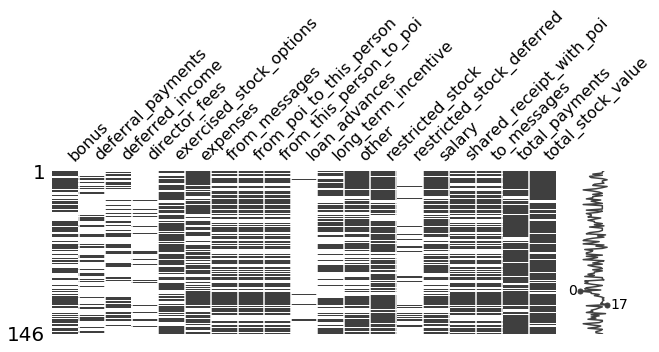

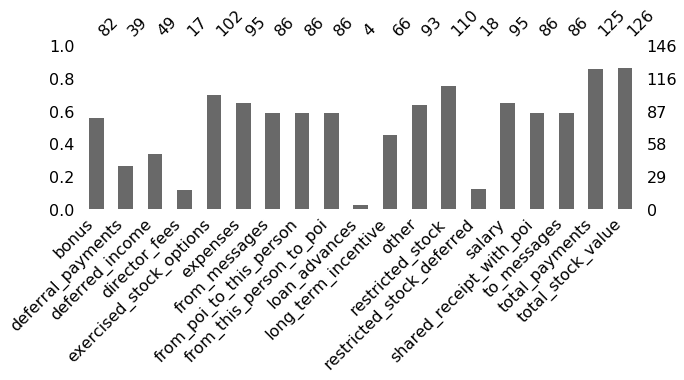

In [42]:
print(df.shape[0])
print(df.isnull().sum())

missingno.matrix(df, figsize = (10,3))

missingno.bar(df, sort='ascending', figsize = (10,3))

In [43]:
deferral_payments = df['deferral_payments']
df = df.drop('deferral_payments', axis=1)
print(df.shape)

(146, 18)


In [46]:
loan_advances = df['loan_advances']
df = df.drop('loan_advances', axis=1)
print(df.shape)

(146, 15)


In [47]:
restricted_stock_deferred = df['restricted_stock_deferred']
df = df.drop('restricted_stock_deferred', axis=1)
print(df.shape)

(146, 14)


In [44]:
deferred_income = df['deferred_income']
df = df.drop('deferred_income', axis=1)
print(df.shape)

(146, 17)


In [45]:
director_fees = df['director_fees']
df = df.drop('director_fees', axis=1)
print(df.shape)

(146, 16)


In [26]:
email_address = df['email_address']
df = df.drop('email_address', axis=1)
print(df.shape)

(146, 20)


In [30]:
name = df['name']
df = df.drop('name', axis=1)
print(df.shape)

(146, 19)


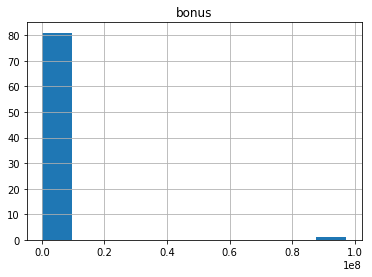

bonus
97343619.0    1
8000000.0     1
7000000.0     1
5600000.0     1
5249999.0     1
4175000.0     1
3100000.0     1
3000000.0     2
2600000.0     1
2500000.0     1
2000000.0     2
1750000.0     1
1700000.0     1
1500000.0     2
1350000.0     1
1300000.0     1
1250000.0     1
1200000.0     2
1150000.0     1
1100000.0     2
1000000.0     6
900000.0      2
850000.0      3
800000.0      4
788750.0      1
750000.0      4
700000.0      5
650000.0      1
600000.0      6
509870.0      1
500000.0      2
450000.0      1
425000.0      1
400000.0      4
350000.0      2
325000.0      3
300000.0      3
250000.0      2
200000.0      3
100000.0      2
70000.0       1
Name: bonus, dtype: int64


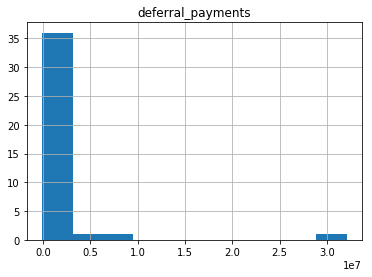

deferral_payments
 32083396.0    1
 6426990.0     1
 3131860.0     1
 2964506.0     1
 2869717.0     1
 2157527.0     1
 2144013.0     1
 1848227.0     1
 1295738.0     1
 1130036.0     1
 875307.0      1
 842924.0      1
 831299.0      1
 774401.0      1
 684694.0      1
 649584.0      1
 564348.0      1
 504610.0      1
 260455.0      1
 227449.0      1
 214678.0      1
 204075.0      1
 202911.0      1
 187469.0      1
 181993.0      1
 181755.0      1
 178980.0      1
 93585.0       1
 85430.0       1
 77716.0       1
 73122.0       1
 53625.0       1
 51365.0       1
 50591.0       1
 27610.0       1
 16586.0       1
 10259.0       1
 7961.0        1
-102500.0      1
Name: deferral_payments, dtype: int64


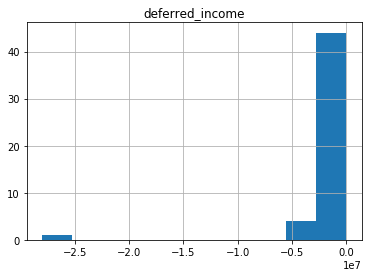

deferred_income
-833.0         1
-1042.0        1
-4167.0        1
-5104.0        1
-10800.0       1
-17500.0       1
-25000.0       4
-33333.0       1
-36666.0       1
-38346.0       1
-41250.0       1
-51042.0       1
-75000.0       1
-98784.0       1
-100000.0      1
-101250.0      1
-103750.0      1
-113784.0      1
-121284.0      1
-125000.0      1
-144062.0      1
-159792.0      1
-200000.0      1
-201641.0      1
-235000.0      1
-262500.0      1
-280000.0      1
-300000.0      2
-400729.0      1
-485813.0      1
-575000.0      1
-583325.0      1
-694862.0      1
-719000.0      1
-775241.0      1
-934484.0      1
-1284000.0     1
-1386055.0     2
-2334434.0     1
-3081055.0     1
-3117011.0     1
-3367011.0     1
-3504386.0     1
-27992891.0    1
Name: deferred_income, dtype: int64


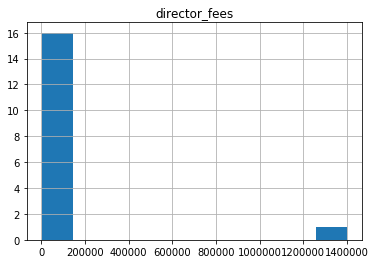

director_fees
1398517.0    1
137864.0     1
125034.0     1
119292.0     1
113784.0     1
112492.0     1
109298.0     1
108750.0     1
108579.0     1
103750.0     1
102492.0     1
101250.0     1
98784.0      1
38346.0      1
36666.0      1
17500.0      1
3285.0       1
Name: director_fees, dtype: int64


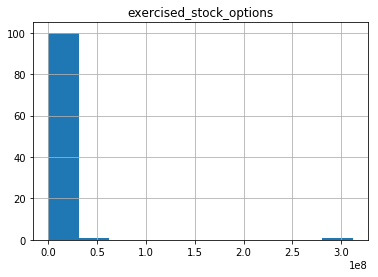

exercised_stock_options
311764000.0    1
34348384.0     1
30766064.0     1
19794175.0     1
19250000.0     1
15364167.0     1
10433518.0     1
8831913.0      1
8308552.0      1
8191755.0      1
7509039.0      1
6680544.0      1
5538001.0      1
5266578.0      1
5210569.0      1
5127155.0      1
4890344.0      1
4452476.0      1
4346544.0      1
4160672.0      1
4158995.0      1
4046157.0      1
3282960.0      1
3181250.0      1
2604490.0      1
2549361.0      1
2542813.0      1
2291113.0      1
2282768.0      1
2218275.0      1
              ..
608750.0       1
607837.0       1
601438.0       1
591250.0       1
506765.0       1
493489.0       1
436515.0       1
431750.0       1
412878.0       1
400478.0       1
384728.0       1
372205.0       1
371750.0       1
343434.0       1
281073.0       1
257817.0       1
192758.0       1
187500.0       1
185063.0       1
176378.0       1
139130.0       1
117551.0       1
98718.0        1
83237.0        1
81042.0        1
59539.0        1
28798.0

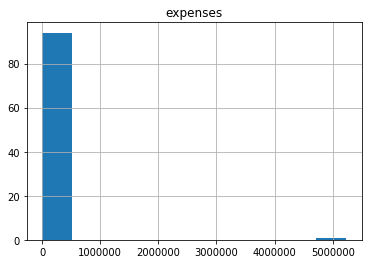

expenses
5235198.0    1
228763.0     1
228656.0     1
178979.0     1
137767.0     1
137108.0     1
129142.0     1
127017.0     1
125978.0     1
118134.0     1
116337.0     1
116335.0     1
103773.0     1
99832.0      1
98849.0      1
96268.0      1
95924.0      1
94299.0      1
86987.0      1
86174.0      1
84208.0      1
83585.0      1
81364.0      1
81353.0      1
78552.0      1
77978.0      1
76169.0      1
65907.0      1
63791.0      1
59175.0      1
            ..
28164.0      1
28093.0      1
27942.0      1
27861.0      1
25785.0      1
23870.0      1
22884.0      1
22344.0      1
21530.0      1
18834.0      1
17355.0      1
16514.0      2
14689.0      1
13868.0      1
11892.0      1
11200.0      1
10181.0      1
9410.0       1
8409.0       1
8211.0       1
5774.0       1
4994.0       1
3486.0       1
3475.0       1
2151.0       1
1413.0       1
1279.0       1
600.0        1
475.0        1
148.0        1
Name: expenses, Length: 94, dtype: int64


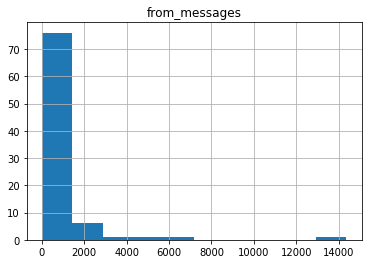

from_messages
14368.0    1
6759.0     1
4343.0     1
3069.0     1
2742.0     1
2681.0     1
2585.0     1
2195.0     1
1941.0     1
1728.0     1
1215.0     1
1073.0     1
1061.0     1
1053.0     1
909.0      1
556.0      1
484.0      1
230.0      1
222.0      1
221.0      1
215.0      1
146.0      1
144.0      1
136.0      1
125.0      1
108.0      1
92.0       1
82.0       1
75.0       1
74.0       1
          ..
56.0       1
52.0       1
49.0       2
48.0       1
45.0       1
44.0       1
41.0       2
40.0       2
39.0       1
38.0       1
36.0       2
34.0       1
33.0       1
32.0       1
30.0       1
29.0       4
28.0       1
27.0       2
26.0       2
25.0       1
22.0       1
21.0       1
19.0       4
18.0       2
17.0       1
16.0       4
15.0       1
14.0       2
13.0       2
12.0       4
Name: from_messages, Length: 64, dtype: int64


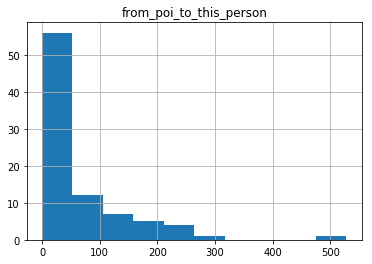

from_poi_to_this_person
528.0     1
305.0     1
251.0     1
242.0     1
240.0     1
228.0     1
204.0     1
199.0     1
188.0     1
186.0     1
180.0     1
156.0     1
144.0     1
140.0     2
123.0     1
115.0     1
106.0     1
94.0      1
92.0      1
88.0      1
74.0      1
67.0      1
66.0      1
64.0      1
61.0      1
58.0      2
54.0      1
53.0      1
52.0      2
47.0      1
44.0      1
42.0      2
41.0      1
40.0      1
39.0      2
38.0      1
37.0      1
35.0      3
32.0      1
29.0      1
28.0      2
25.0      3
24.0      1
23.0      1
22.0      1
20.0      1
17.0      1
16.0      1
13.0      2
12.0      2
11.0      1
10.0      6
8.0       1
7.0       1
4.0       2
1.0       1
0.0      12
Name: from_poi_to_this_person, dtype: int64


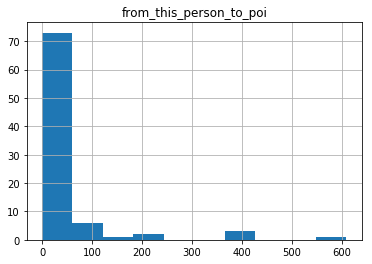

from_this_person_to_poi
609.0     1
411.0     1
387.0     1
386.0     1
194.0     2
171.0     1
108.0     1
83.0      1
71.0      1
65.0      2
61.0      1
49.0      1
48.0      2
38.0      1
37.0      1
30.0      1
27.0      1
26.0      1
25.0      1
24.0      1
23.0      1
21.0      1
20.0      1
19.0      1
18.0      1
17.0      1
16.0      1
15.0      4
14.0      3
13.0      1
12.0      1
11.0      3
8.0       2
7.0       3
6.0       3
5.0       2
4.0       3
3.0       2
2.0       3
1.0       6
0.0      20
Name: from_this_person_to_poi, dtype: int64


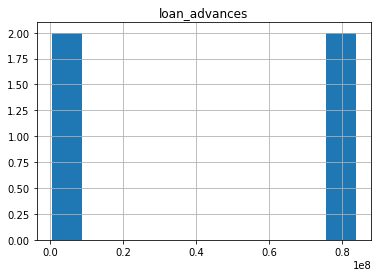

loan_advances
83925000.0    1
81525000.0    1
2000000.0     1
400000.0      1
Name: loan_advances, dtype: int64


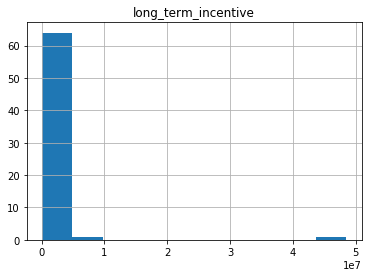

long_term_incentive
48521928.0    1
5145434.0     1
3600000.0     1
2234774.0     1
2035380.0     1
1920000.0     1
1736055.0     1
1725545.0     1
1617011.0     3
1586055.0     1
1387399.0     1
1294981.0     1
1105218.0     1
983346.0      1
974293.0      1
831809.0      1
808346.0      1
769862.0      1
694862.0      2
602671.0      1
556416.0      2
554422.0      4
540751.0      1
484000.0      1
476451.0      1
461912.0      1
422158.0      1
415657.0      1
375304.0      2
374347.0      1
369721.0      1
365625.0      1
350000.0      1
335349.0      1
323466.0      1
312500.0      1
304805.0      3
300000.0      2
275000.0      2
256191.0      1
200000.0      2
180250.0      1
175000.0      2
156250.0      1
150000.0      1
135836.0      1
125000.0      1
100000.0      1
93750.0       1
75000.0       1
71023.0       1
69223.0       1
Name: long_term_incentive, dtype: int64


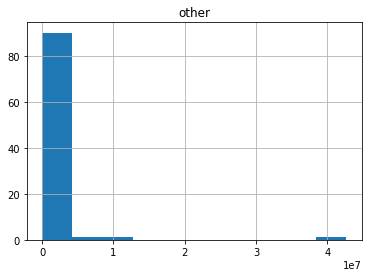

other
42667589.0    1
10359729.0    1
7427621.0     1
2818454.0     1
2660303.0     1
1852186.0     1
1829457.0     1
1573324.0     1
1553729.0     1
1085463.0     1
907502.0      1
864523.0      1
819288.0      1
680833.0      1
465357.0      1
427316.0      1
426629.0      1
425688.0      1
416441.0      1
401481.0      1
401130.0      1
400572.0      1
374689.0      1
362096.0      1
356071.0      1
307895.0      1
301026.0      1
297353.0      1
285414.0      1
277464.0      1
             ..
1661.0        1
1621.0        1
1568.0        1
1552.0        1
1425.0        1
1411.0        1
1231.0        1
1215.0        1
1191.0        1
1105.0        1
972.0         1
947.0         1
891.0         1
874.0         1
778.0         1
774.0         1
713.0         1
705.0         1
566.0         1
540.0         2
494.0         1
486.0         1
473.0         1
330.0         1
272.0         1
176.0         1
162.0         1
152.0         1
69.0          1
2.0           1
Name: other, Lengt

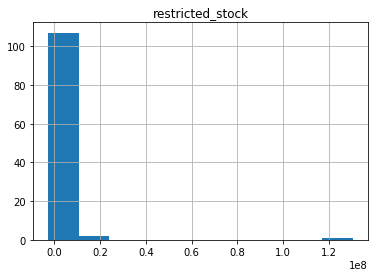

restricted_stock
 130322299.0    1
 14761694.0     1
 13847074.0     1
 8453763.0      1
 6843672.0      1
 4188667.0      1
 4131594.0      1
 3942714.0      1
 3654808.0      1
 3576206.0      1
 2796177.0      1
 2748364.0      1
 2502063.0      1
 2217299.0      1
 2046079.0      1
 2041016.0      1
 1794412.0      1
 1788391.0      1
 1787380.0      1
 1757552.0      1
 1552453.0      1
 1478269.0      1
 1392142.0      1
 1323148.0      1
 1293424.0      1
 1248318.0      1
 1034346.0      1
 1008149.0      1
 985032.0       1
 969729.0       1
               ..
 363428.0       1
 360528.0       2
 346663.0       1
 315068.0       3
 307301.0       1
 283649.0       1
 264013.0       1
 259907.0       1
 252055.0       1
 235370.0       1
 213063.0       1
 208809.0       1
 208510.0       1
 207940.0       1
 201483.0       1
 196983.0       1
 189041.0       3
 161602.0       1
 157569.0       1
 153686.0       1
 151418.0       1
 145796.0       1
 141833.0       1
 126027.0  

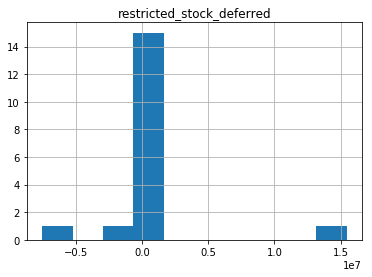

restricted_stock_deferred
 15456290.0    1
 44093.0       1
-32460.0       1
-44093.0       1
-72419.0       1
-82782.0       1
-94556.0       1
-126027.0      1
-140264.0      1
-153686.0      1
-307301.0      1
-315068.0      1
-329825.0      1
-409554.0      1
-472568.0      1
-560222.0      1
-1787380.0     1
-7576788.0     1
Name: restricted_stock_deferred, dtype: int64


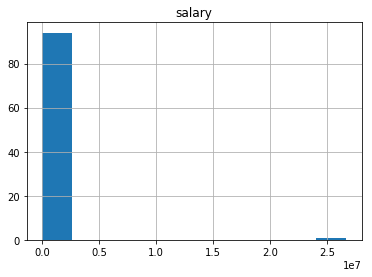

salary
26704229.0    1
1111258.0     1
1072321.0     1
1060932.0     1
655037.0      1
510364.0      1
492375.0      1
440698.0      1
428780.0      1
420636.0      1
415189.0      1
404338.0      1
374125.0      1
370448.0      1
365788.0      1
365163.0      1
365038.0      1
357091.0      1
349487.0      1
339288.0      1
330546.0      1
329078.0      1
317543.0      1
314288.0      1
309946.0      1
304588.0      1
304110.0      1
288589.0      1
288558.0      1
288542.0      1
             ..
222093.0      1
221003.0      1
216582.0      1
213999.0      1
213625.0      1
211844.0      1
211788.0      1
210692.0      1
210500.0      1
206121.0      1
201955.0      1
199157.0      1
197091.0      1
192008.0      1
187922.0      1
184899.0      1
182245.0      1
174246.0      1
170941.0      1
162779.0      1
158403.0      1
130724.0      1
96840.0       1
94941.0       1
85274.0       1
80818.0       1
76399.0       1
63744.0       1
6615.0        1
477.0         1
Name: salary, Len

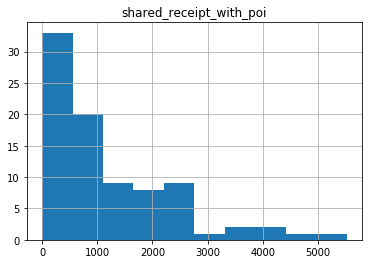

shared_receipt_with_poi
5521.0    1
4527.0    1
3962.0    1
3920.0    1
3669.0    1
3639.0    1
2979.0    1
2672.0    1
2639.0    1
2565.0    1
2477.0    1
2411.0    1
2333.0    1
2326.0    1
2271.0    1
2228.0    1
2189.0    1
2188.0    1
2103.0    1
2097.0    1
2042.0    1
1902.0    1
1847.0    1
1730.0    1
1604.0    1
1593.0    1
1585.0    1
1469.0    1
1407.0    1
1401.0    1
         ..
508.0     1
477.0     1
471.0     1
465.0     1
463.0     1
437.0     1
395.0     1
379.0     1
337.0     1
300.0     1
233.0     1
215.0     1
196.0     1
178.0     1
127.0     1
119.0     1
117.0     1
114.0     2
91.0      1
73.0      1
71.0      1
58.0      1
50.0      1
41.0      1
23.0      2
22.0      1
12.0      1
10.0      1
3.0       1
2.0       1
Name: shared_receipt_with_poi, Length: 83, dtype: int64


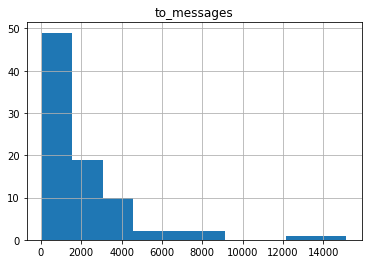

to_messages
15149.0    1
12754.0    1
8305.0     1
7991.0     1
7315.0     1
7259.0     1
6019.0     1
4607.0     1
4273.0     1
4009.0     1
3627.0     1
3523.0     1
3329.0     1
3275.0     1
3221.0     1
3187.0     1
3136.0     1
3093.0     1
2902.0     1
2822.0     1
2649.0     1
2647.0     1
2598.0     1
2572.0     1
2475.0     1
2374.0     1
2355.0     1
2350.0     1
2192.0     1
2181.0     1
          ..
719.0      1
714.0      1
672.0      1
671.0      1
653.0      1
613.0      1
573.0      1
566.0      1
533.0      1
523.0      1
517.0      1
504.0      1
496.0      1
460.0      1
400.0      1
383.0      1
312.0      1
266.0      1
258.0      1
232.0      1
225.0      1
209.0      1
176.0      1
169.0      1
136.0      1
128.0      1
111.0      1
102.0      1
58.0       1
57.0       1
Name: to_messages, Length: 86, dtype: int64


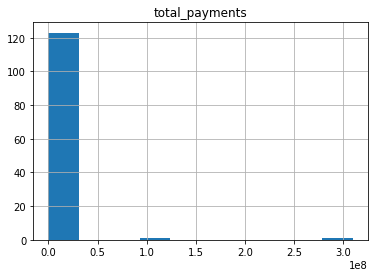

total_payments
309886585.0    1
103559793.0    1
17252530.0     1
15456290.0     1
10425757.0     1
8682716.0      1
8407016.0      1
5634343.0      1
5501630.0      1
4747979.0      1
4677574.0      1
4484442.0      1
4335388.0      1
4099771.0      1
3859065.0      1
3676340.0      1
3471141.0      1
3202070.0      1
3131860.0      1
3123383.0      1
3100224.0      1
3038702.0      1
2692324.0      1
2669589.0      1
2664228.0      1
2652612.0      1
2424083.0      1
2368151.0      1
2355702.0      1
2146973.0      1
              ..
360300.0       1
319941.0       1
288682.0       1
249787.0       1
228656.0       1
228474.0       1
213071.0       1
211725.0       1
189583.0       1
182466.0       1
181755.0       1
119292.0       1
111529.0       1
102500.0       1
91093.0        1
87492.0        1
87410.0        1
84992.0        1
83750.0        1
77492.0        1
55097.0        1
50591.0        1
49288.0        1
27942.0        1
7961.0         1
3750.0         1
2151.0         1

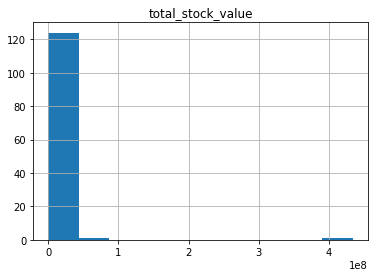

total_stock_value
 434509511.0    1
 49110078.0     1
 30766064.0     1
 26093672.0     1
 23817930.0     1
 22542539.0     1
 15144123.0     1
 14622185.0     1
 11884758.0     1
 10623258.0     1
 8831913.0      1
 8317782.0      1
 7890324.0      1
 7307594.0      1
 7256648.0      1
 6678735.0      1
 6391065.0      1
 6153642.0      1
 6079137.0      1
 6077885.0      1
 5898997.0      1
 5819980.0      1
 5243487.0      1
 5167144.0      1
 4817796.0      1
 4221891.0      1
 3745048.0      1
 3614261.0      1
 3444470.0      1
 3128982.0      1
               ..
 441096.0       1
 431750.0       1
 417619.0       1
 412878.0       1
 384930.0       1
 372205.0       1
 371750.0       1
 368705.0       1
 360528.0       1
 346663.0       1
 343434.0       1
 318607.0       1
 257817.0       1
 252055.0       1
 221141.0       1
 208510.0       1
 207940.0       1
 192758.0       1
 189518.0       1
 176378.0       1
 159211.0       1
 151418.0       1
 139130.0       1
 126027.0 

In [37]:
for col in df.columns:
    df[col].hist()
    plt.title(col)
    plt.show()
    print(col)
    print(df[col].value_counts().sort_index(ascending= False))

In [62]:
for col in df.columns:
#     print(df[col][df[col]>np.percentile(df[~df[col].isnull()][col], q=95)])
    df[col][df[col]>np.percentile(df[~df[col].isnull()][col], q=90)] = np.percentile(df[~df[col].isnull()][col], q=90)
    print(df[~df[col].isnull()][col].mean())
    print(np.percentile(df[~df[col].isnull()][col], q=90))
    print('--------')
#     df[col].replace({df[col].max(): np.df[col]})

1034861.2195121954
2924000.000000004
--------
2135352.965686275
7351624.950000009
--------
51122.70526315789
116983.92000000001
--------
327.7151162790698
1781.25
--------
56.73255813953488
186.5
--------
19.72093023255814
74.0
--------
666149.7727272727
1728172.5
--------
238106.39784946232
1021397.0399999991
--------
810522.320909091
2748842.13
--------
259962.1052631579
417149.92000000004
--------
1058.906976744186
2583.5
--------
1650.5697674418604
4075.0
--------
1498188.8288000003
4184593.1200000024
--------
2286912.4523809524
7453276.5
--------


In [67]:
for col in df.columns:
    df[col].fillna(df[col].mean(), inplace=True)

In [68]:
print(len(train.index.values))
print(len(df))
train_df = df.iloc[:len(train.index.values), :]
test_df = df.iloc[len(train.index.values):, :]
print(train_df.shape)
print(test_df.shape)

113
146
(113, 14)
(33, 14)


In [69]:
target = poi.values
features = train_df.values

tree_classifier = tree.DecisionTreeClassifier()
model = tree_classifier.fit(features, target)

In [70]:
importance = pd.DataFrame(np.array(model.feature_importances_)[:np.newaxis], index=train_df.columns.values, columns=['Importance'])
importance = importance.sort_values(by='Importance', ascending=False)
print(importance)

print(model.score(features, target))

print(importance.values.cumsum())

                         Importance
exercised_stock_options    0.194616
other                      0.181607
bonus                      0.163548
total_payments             0.162981
expenses                   0.157009
salary                     0.065192
shared_receipt_with_poi    0.065192
from_this_person_to_poi    0.009855
from_messages              0.000000
from_poi_to_this_person    0.000000
long_term_incentive        0.000000
restricted_stock           0.000000
to_messages                0.000000
total_stock_value          0.000000
1.0
[0.1946163  0.37622344 0.53977146 0.70275223 0.85976073 0.92495304
 0.99014535 1.         1.         1.         1.         1.
 1.         1.        ]


In [76]:
features_test = test_df.values

test_predict = model.predict(features_test)
df = pd.DataFrame({'poi':test_predict, 'name':name.iloc[len(train.index.values):]})
df.to_csv('predict.csv', index=False)

# https://www.kaggle.com/c/titanic

0         BELDEN TIMOTHY N
1       BOWEN JR RAYMOND M
2           HANNON KEVIN P
3         DELAINEY DAVID W
4         CAUSEY RICHARD A
5         HICKERSON GARY J
6           FREVERT MARK A
7              CHAN RONNIE
8     DONAHUE JR JEFFREY M
9        REYNOLDS LAWRENCE
10        HORTON STANLEY C
11           LEWIS RICHARD
12      SHERRICK JEFFREY B
13          MEYER JEROME J
14     DERRICK JR. JAMES V
15                PIRO JIM
16     DETMERING TIMOTHY J
17       KISHKILL JOSEPH G
18          BAY FRANKLIN R
19          PRENTICE JAMES
20                   TOTAL
21          FALLON JAMES B
22              METTS MARK
23           WODRASKA JOHN
24     MORDAUNT KRISTINA M
25        CARTER REBECCA C
26        BHATNAGAR SANJAY
27        WALTERS GARETH W
28         BIBI PHILIPPE A
29         SHERRIFF JOHN R
30            GIBBS DANA R
31          LINDHOLM TOD A
32         MCMAHON JEFFREY
Name: name, dtype: object
